## Correlation b/w PageRank and Retrievability

### Collection: WT10g

##### Imports

In [35]:
# imports
import pickle
import csv
import scipy
import rbo
import matplotlib.pyplot as plt

##### load data

In [11]:
pagerank_path = './PageRank/pagerank-wt10g.tsv'

pagerank = {}
with open(pagerank_path, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        # pageid -> pagerank_score
        pagerank[row[0]] = float(row[1])

In [12]:
rd_aol_path = './Retrievability/allrd-docids-aol.pickle'
rd_artificial_path = './Retrievability/allrd-docids-artificial.pickle'
norm_rd_artificial_path = './Retrievability/norm_allrd_docids_artificial.pickle'
rd_azzopardi_path = './Retrievability/allrd-docids-azzopardi-artificial.pickle'

with open(rd_aol_path, 'rb') as f:
    allrd_aol = pickle.load(f)

with open(rd_artificial_path, 'rb') as f:
    allrd_artificial = pickle.load(f)
    
with open(norm_rd_artificial_path, 'rb') as f:
    norm_allrd_artificial = pickle.load(f)
    
with open(rd_azzopardi_path, 'rb') as f:
    allrd_azzopardi = pickle.load(f)

#### Plots

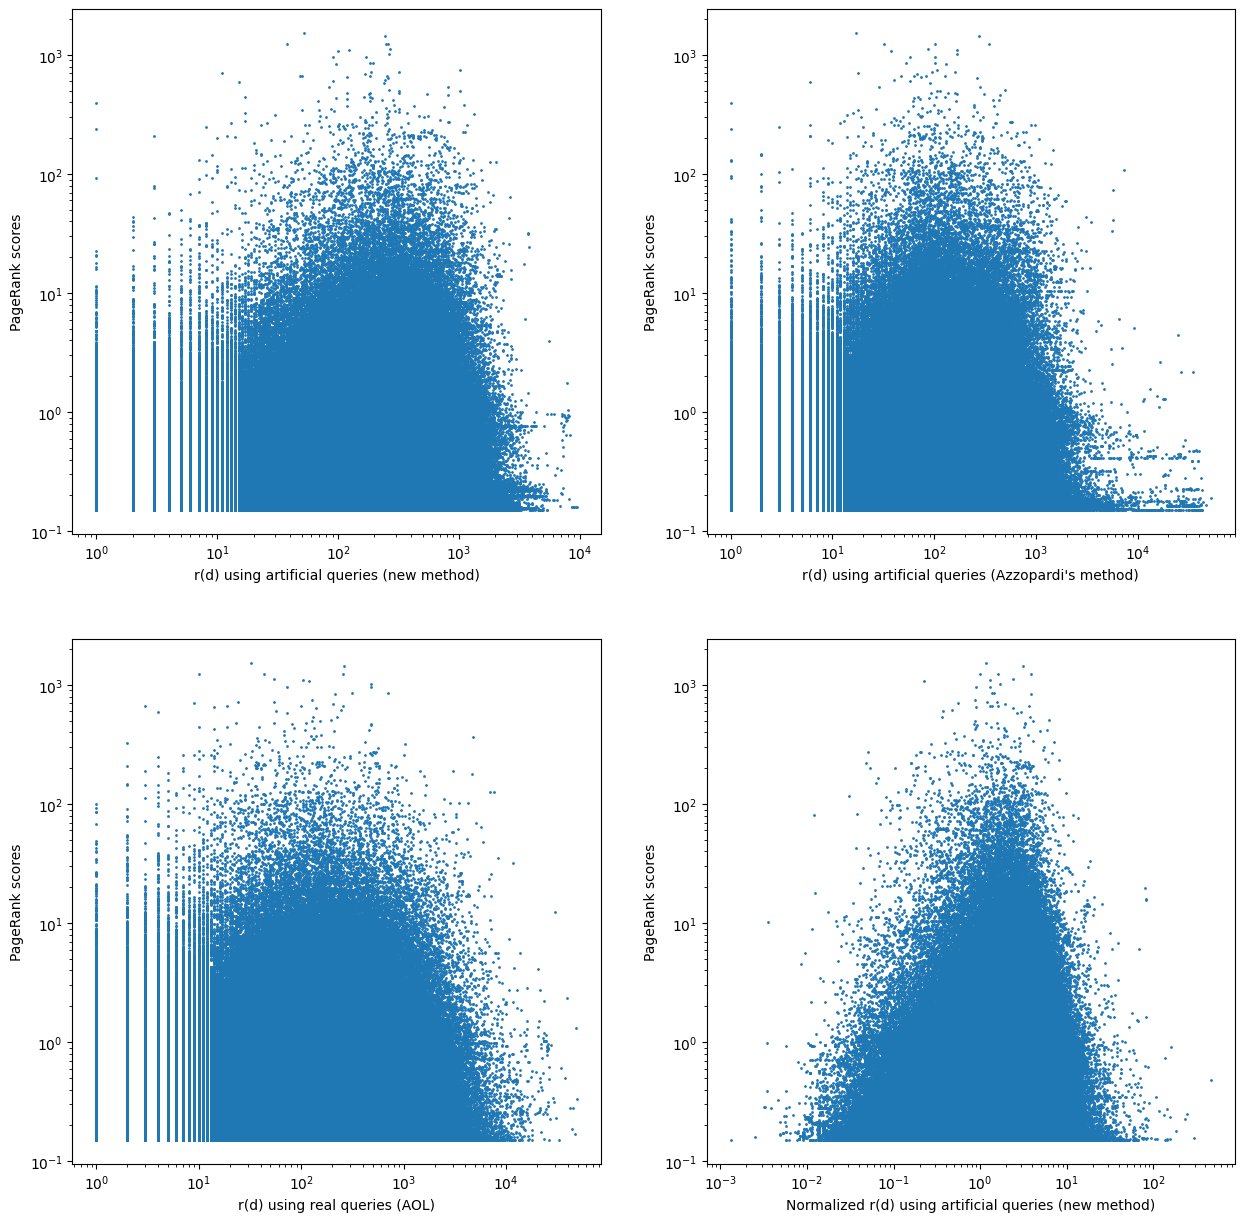

In [38]:
# plot PageRank vs r(d)s

# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for ax in axs.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')

c = 'rd_bm25_100'
common_pageids = set(pagerank) & set(allrd_artificial[c])
x_my_artificial = [allrd_artificial[c][docid] for docid in common_pageids]
y_pagerank = [pagerank[docid] for docid in common_pageids]

# Plot r(d)
axs[0, 0].scatter(x_my_artificial, y_pagerank, s=1)
axs[0, 0].set_xlabel('r(d) using artificial queries (new method)')
axs[0, 0].set_ylabel('PageRank scores')
# plt.title('r(d) comparison')

common_pageids = set(pagerank) & set(allrd_azzopardi[c])
x_azzopardi = [allrd_azzopardi[c][docid] for docid in common_pageids]
y_pagerank = [pagerank[docid] for docid in common_pageids]

axs[0, 1].scatter(x_azzopardi, y_pagerank, s=1)
axs[0, 1].set_xlabel("r(d) using artificial queries (Azzopardi's method)")
axs[0, 1].set_ylabel('PageRank scores')

common_pageids = set(pagerank) & set(allrd_aol[c])
x_aol = [allrd_aol[c][docid] for docid in common_pageids]
y_pagerank = [pagerank[docid] for docid in common_pageids]

axs[1, 0].scatter(x_aol, y_pagerank, s=1)
axs[1, 0].set_xlabel("r(d) using real queries (AOL)")
axs[1, 0].set_ylabel('PageRank scores')

common_pageids = set(pagerank) & set(norm_allrd_artificial[c])
x_norm_artificial = [norm_allrd_artificial[c][docid] for docid in common_pageids]
y_pagerank = [pagerank[docid] for docid in common_pageids]

axs[1, 1].scatter(x_norm_artificial, y_pagerank, s=1)
axs[1, 1].set_xlabel("Normalized r(d) using artificial queries (new method)")
axs[1, 1].set_ylabel('PageRank scores')

plt.show()

#### Pearson's Correlation Coefficient

In [18]:
print("\nPearson's Correlation Coefficient calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_artificial[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_artificial[c][pageid])
    # Pearson's correlation computation
    rho, pval = scipy.stats.pearsonr(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (artifical queries) for c = {c.split("_")[-1]}:\t rho = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(norm_allrd_artificial[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(norm_allrd_artificial[c][pageid])
    # Pearson's correlation computation
    rho, pval = scipy.stats.pearsonr(pagerank_list, rd_list)
    print(f'For PageRank vs normalized r(d) (artifical queries) for c = {c.split("_")[-1]}:\t rho = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_azzopardi[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_azzopardi[c][pageid])
    # Pearson's correlation computation
    rho, pval = scipy.stats.pearsonr(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (Azzopardi queries) for c = {c.split("_")[-1]}:\t rho = {rho:.4f}\t\tp-value = {pval}')


print()
for c in sorted(allrd_aol, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_aol[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_aol[c][pageid])
    # Pearson's correlation computation
    rho, pval = scipy.stats.pearsonr(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (AOL queries) for c = {c.split("_")[-1]}:\t rho = {rho:.4f}\t\tp-value = {pval}')


Pearson's Correlation Coefficient calculation

For PageRank vs r(d) (artifical queries) for c = 10:	 rho = 0.0062		p-value = 8.113750703551588e-14
For PageRank vs r(d) (artifical queries) for c = 20:	 rho = 0.0066		p-value = 3.671731997330985e-16
For PageRank vs r(d) (artifical queries) for c = 30:	 rho = 0.0065		p-value = 4.783514786678002e-16
For PageRank vs r(d) (artifical queries) for c = 50:	 rho = 0.0064		p-value = 1.602792998622798e-15
For PageRank vs r(d) (artifical queries) for c = 100:	 rho = 0.0063		p-value = 2.0157404725164992e-15

For PageRank vs normalized r(d) (artifical queries) for c = 10:	 rho = 0.0010		p-value = 0.23826320226446038
For PageRank vs normalized r(d) (artifical queries) for c = 20:	 rho = 0.0006		p-value = 0.4379639643237695
For PageRank vs normalized r(d) (artifical queries) for c = 30:	 rho = 0.0001		p-value = 0.8923870799108146
For PageRank vs normalized r(d) (artifical queries) for c = 50:	 rho = -0.0005		p-value = 0.5727585221982849
For PageRank vs

#### Spearman's Rank Correlation Coefficient

In [17]:
print("\nSpearman's Correlation Coefficient calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_artificial[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_artificial[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Spearman's correlation computation
    corr, pval = scipy.stats.spearmanr(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (artifical queries) for c = {c.split("_")[-1]}:\t r = {corr:.4f}\t\tp-value = {pval}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(norm_allrd_artificial[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(norm_allrd_artificial[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Spearman's correlation computation
    corr, pval = scipy.stats.spearmanr(pagerank_list, rd_list)
    print(f'For PageRank vs normalized r(d) (artifical queries) for c = {c.split("_")[-1]}:\t r = {corr:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_azzopardi[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_azzopardi[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Spearman's correlation computation
    corr, pval = scipy.stats.spearmanr(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (Azzopardi queries) for c = {c.split("_")[-1]}:\t r = {corr:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_aol, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_aol[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_aol[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Spearman's correlation computation
    corr, pval = scipy.stats.spearmanr(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (AOL queries) for c = {c.split("_")[-1]}:\t r = {corr:.4f}\t\tp-value = {pval}')


Spearman's Correlation Coefficient calculation

For PageRank vs r(d) (artifical queries) for c = 10:	 r = 0.0604		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 20:	 r = 0.0618		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 30:	 r = 0.0622		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 50:	 r = 0.0615		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 100:	 r = 0.0589		p-value = 0.0

For PageRank vs normalized r(d) (artifical queries) for c = 10:	 r = 0.0997		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 20:	 r = 0.1074		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 30:	 r = 0.1110		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 50:	 r = 0.1133		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 100:	 r = 0.1143		p-value = 0.0

For PageRank vs r(d) (Azzopardi queries) for c = 10:	 r = 0.0659		p-value = 0.0
For PageRank

#### Kendall Rank Correlation Coefficient

In [15]:
print("\nKendall's Correlation Coefficient calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_artificial[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_artificial[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Kendall's correlation computation
    corr, pval = scipy.stats.kendalltau(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (artifical queries) for c = {c.split("_")[-1]}:\t tau = {corr:.4f}\t\tp-value = {pval}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(norm_allrd_artificial[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(norm_allrd_artificial[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Kendall's correlation computation
    corr, pval = scipy.stats.kendalltau(pagerank_list, rd_list)
    print(f'For PageRank vs normalized r(d) (artifical queries) for c = {c.split("_")[-1]}:\t tau = {corr:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_azzopardi[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_azzopardi[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Kendall's correlation computation
    corr, pval = scipy.stats.kendalltau(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (Azzopardi queries) for c = {c.split("_")[-1]}:\t tau = {corr:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_aol, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_aol[c])
    pagerank_list, rd_list = [], []
    for pageid in sorted(common_pageids):
        pagerank_list.append(pagerank[pageid])
        rd_list.append(allrd_aol[c][pageid])
    pagerank_list, rd_list = zip(*sorted(zip(pagerank_list,rd_list), reverse=True))
    # Kendall's correlation computation
    corr, pval = scipy.stats.kendalltau(pagerank_list, rd_list)
    print(f'For PageRank vs r(d) (AOL queries) for c = {c.split("_")[-1]}:\t tau = {corr:.4f}\t\tp-value = {pval}')


Kendall's Correlation Coefficient calculation

For PageRank vs r(d) (artifical queries) for c = 10:	 tau = 0.0406		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 20:	 tau = 0.0413		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 30:	 tau = 0.0415		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 50:	 tau = 0.0409		p-value = 0.0
For PageRank vs r(d) (artifical queries) for c = 100:	 tau = 0.0391		p-value = 0.0

For PageRank vs normalized r(d) (artifical queries) for c = 10:	 tau = 0.0666		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 20:	 tau = 0.0718		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 30:	 tau = 0.0741		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 50:	 tau = 0.0756		p-value = 0.0
For PageRank vs normalized r(d) (artifical queries) for c = 100:	 tau = 0.0762		p-value = 0.0

For PageRank vs r(d) (Azzopardi queries) for c = 10:	 tau = 0.0447		p-val

#### Rank Biased Overlap (RBO) measure

In [13]:
print("RBO measure calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_artificial[c])
    pagerank_list = [pageid for pageid,_ in sorted(pagerank.items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    rd_list = [pageid for pageid,_ in sorted(dict(allrd_artificial[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    # RBO measure computation
    rbo_measure = rbo.RankingSimilarity(pagerank_list, rd_list).rbo()
    print(f'For PageRank vs r(d) (artifical queries) for c = {c.split("_")[-1]}:\t\t rbo = {rbo_measure:.4f}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(norm_allrd_artificial[c])
    pagerank_list = [pageid for pageid,_ in sorted(pagerank.items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    rd_list = [pageid for pageid,_ in sorted(dict(norm_allrd_artificial[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    # RBO measure computation
    rbo_measure = rbo.RankingSimilarity(pagerank_list, rd_list).rbo()
    print(f'For PageRank vs Normalized r(d) (artifical queries) for c = {c.split("_")[-1]}:\t\t rbo = {rbo_measure:.4f}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_azzopardi[c])
    pagerank_list = [pageid for pageid,_ in sorted(pagerank.items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    rd_list = [pageid for pageid,_ in sorted(dict(allrd_azzopardi[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    # RBO measure computation
    rbo_measure = rbo.RankingSimilarity(pagerank_list, rd_list).rbo()
    print(f'For PageRank vs r(d) (Azzopardi queries) for c = {c.split("_")[-1]}:\t\t rbo = {rbo_measure:.4f}')

print()
for c in sorted(allrd_aol, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(pagerank) & set(allrd_aol[c])
    pagerank_list = [pageid for pageid,_ in sorted(pagerank.items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    rd_list = [pageid for pageid,_ in sorted(dict(allrd_aol[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    # RBO measure computation
    rbo_measure = rbo.RankingSimilarity(pagerank_list, rd_list).rbo()
    print(f'For PageRank vs r(d) (AOL queries) for c = {c.split("_")[-1]}:\t\t rbo = {rbo_measure:.4f}')

RBO measure calculation

For PageRank vs r(d) (artifical queries) for c = 10:		 rbo = 0.5122
For PageRank vs r(d) (artifical queries) for c = 20:		 rbo = 0.5117
For PageRank vs r(d) (artifical queries) for c = 30:		 rbo = 0.5113
For PageRank vs r(d) (artifical queries) for c = 50:		 rbo = 0.5107
For PageRank vs r(d) (artifical queries) for c = 100:		 rbo = 0.5095

For PageRank vs Normalized r(d) (artifical queries) for c = 10:		 rbo = 0.5226
For PageRank vs Normalized r(d) (artifical queries) for c = 20:		 rbo = 0.5237
For PageRank vs Normalized r(d) (artifical queries) for c = 30:		 rbo = 0.5240
For PageRank vs Normalized r(d) (artifical queries) for c = 50:		 rbo = 0.5240
For PageRank vs Normalized r(d) (artifical queries) for c = 100:		 rbo = 0.5237

For PageRank vs r(d) (Azzopardi queries) for c = 10:		 rbo = 0.5166
For PageRank vs r(d) (Azzopardi queries) for c = 20:		 rbo = 0.5174
For PageRank vs r(d) (Azzopardi queries) for c = 30:		 rbo = 0.5177
For PageRank vs r(d) (Azzopardi 

## Correlation b/w Retrievability on Real Queries vs Artificial Queries

##### Imports

In [1]:
# imports
import pickle
import csv
import scipy
import rbo
import matplotlib.pyplot as plt

##### load data

In [2]:
rd_aol_path = './Retrievability/allrd-docids-aol.pickle'
rd_artificial_path = './Retrievability/allrd-docids-artificial.pickle'
norm_rd_artificial_path = './Retrievability/norm_allrd_docids_artificial.pickle'
rd_azzopardi_path = './Retrievability/allrd-docids-azzopardi-artificial.pickle'

with open(rd_aol_path, 'rb') as f:
    allrd_aol = pickle.load(f)

with open(rd_artificial_path, 'rb') as f:
    allrd_artificial = pickle.load(f)
    
with open(norm_rd_artificial_path, 'rb') as f:
    norm_allrd_artificial = pickle.load(f)
    
with open(rd_azzopardi_path, 'rb') as f:
    allrd_azzopardi = pickle.load(f)

#### Plots

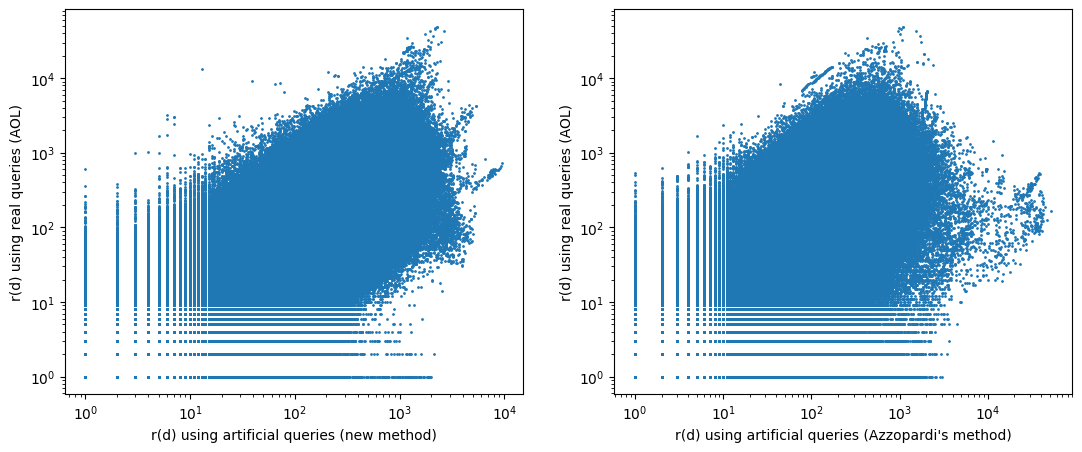

In [39]:
# plot AOL r(d) vs Other r(d)s

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

for ax in axs.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')

c = 'rd_bm25_100'
common_pageids = set(allrd_aol[c]) & set(allrd_artificial[c])
x_my_artificial = [allrd_artificial[c][docid] for docid in common_pageids]
y_aol = [allrd_aol[c][docid] for docid in common_pageids]

# Plot r(d)
axs[0].scatter(x_my_artificial, y_aol, s=1)
axs[0].set_xlabel('r(d) using artificial queries (new method)')
axs[0].set_ylabel('r(d) using real queries (AOL)')
# plt.title('r(d) comparison')

common_pageids = set(allrd_aol[c]) & set(allrd_azzopardi[c])
x_azzopardi = [allrd_azzopardi[c][docid] for docid in common_pageids]
y_aol = [allrd_aol[c][docid] for docid in common_pageids]

axs[1].scatter(x_azzopardi, y_aol, s=1)
axs[1].set_xlabel("r(d) using artificial queries (Azzopardi's method)")
axs[1].set_ylabel('r(d) using real queries (AOL)')

plt.show()

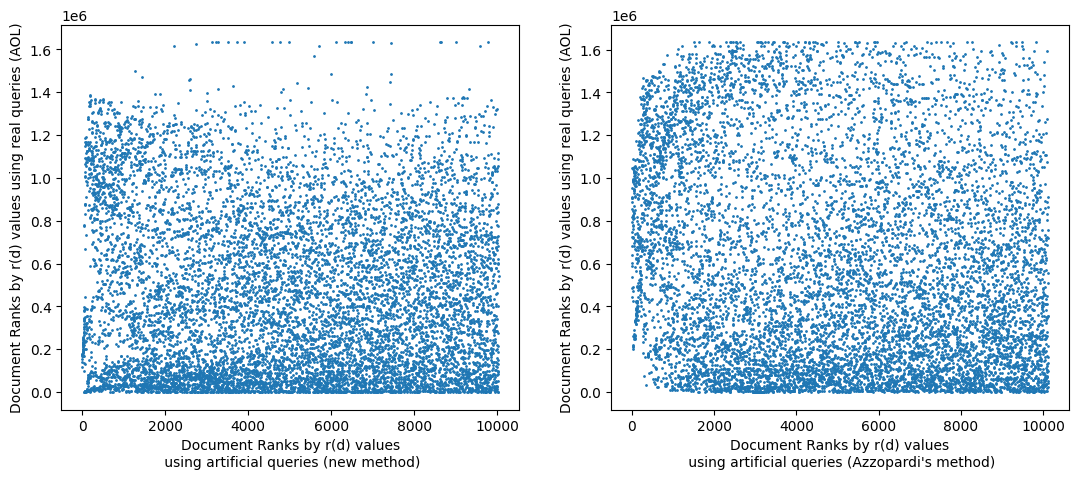

In [5]:
# plot AOL r(d) doc rank vs Other r(d)s doc rank

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

c = 'rd_bm25_100'
common_pageids = set(allrd_aol[c]) & set(allrd_artificial[c])

# Sort r(d) values for each collection in decreasing order
sorted_rd_aol = sorted(allrd_aol[c].items(), key=lambda x: x[1], reverse=True)
ranks_rd_aol = {docid:i+1 for i, (docid, rd) in enumerate(sorted_rd_aol)}
sorted_rd_artificial = sorted(allrd_artificial[c].items(), key=lambda x: x[1], reverse=True)
ranks_rd_artificial = {docid:i+1 for i, (docid, rd) in enumerate(sorted_rd_artificial)}

# Get the ranks of the documents based on their sorted r(d) values
x_my_artificial = [ranks_rd_artificial[docid] for docid in common_pageids]
y_aol = [ranks_rd_aol[docid] for docid in common_pageids]

x_my_artificial, y_aol = zip(*(sorted(zip(x_my_artificial, y_aol))))

# Plot ranks of documents
axs[0].scatter(x_my_artificial[:10000], y_aol[:10000], s=1)
axs[0].set_xlabel('Document Ranks by r(d) values\n using artificial queries (new method)')
axs[0].set_ylabel('Document Ranks by r(d) values using real queries (AOL)')

common_pageids = set(allrd_aol[c]) & set(allrd_azzopardi[c])

# Sort r(d) values for each collection in decreasing order
sorted_rd_azzopardi = sorted(allrd_azzopardi[c].items(), key=lambda x: x[1], reverse=True)
ranks_rd_azzopardi = {docid:i+1 for i, (docid, rd) in enumerate(sorted_rd_azzopardi)}

# Get the ranks of the documents based on their sorted r(d) values
x_azzopardi = [ranks_rd_azzopardi[docid] for docid in common_pageids]
y_aol = [ranks_rd_aol[docid] for docid in common_pageids]

x_azzopardi, y_aol = zip(*(sorted(zip(x_azzopardi, y_aol))))

# Plot ranks of documents
axs[1].scatter(x_azzopardi[:10000], y_aol[:10000], s=1)
axs[1].set_xlabel("Document Ranks by r(d) values\n using artificial queries (Azzopardi's method)")
axs[1].set_ylabel('Document Ranks by r(d) values using real queries (AOL)')

plt.show()


#### Pearson's Correlation Coefficient

In [7]:
print("\nPearson's Correlation Coefficient calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_artificial[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(allrd_artificial[c][pageid])
    # Pearson's correlation computation
    rho, pval = scipy.stats.pearsonr(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial r(d) for c = {c.split("_")[-1]}:\t r = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_azzopardi[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(allrd_azzopardi[c][pageid])
    # Pearson's correlation computation
    rho, pval = scipy.stats.pearsonr(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial "Azzopardi" r(d) for c = {c.split("_")[-1]}:\t r = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(norm_allrd_artificial[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(norm_allrd_artificial[c][pageid])
    # Pearson's correlation computation
    rho, pval = scipy.stats.pearsonr(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial "Normalized" r(d) for c = {c.split("_")[-1]}:\t r = {rho:.4f}\t\tp-value = {pval}')


Pearson's Correlation Coefficient calculation

For AOL r(d) vs Artificial r(d) for c = 10:	 r = 0.2357		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 20:	 r = 0.2584		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 30:	 r = 0.2715		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 50:	 r = 0.2877		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 100:	 r = 0.3135		p-value = 0.0

For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 10:	 r = 0.0773		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 20:	 r = 0.0833		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 30:	 r = 0.0874		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 50:	 r = 0.0934		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 100:	 r = 0.1100		p-value = 0.0

For AOL r(d) vs Artificial "Normalized" r(d) for c = 10:	 r = 0.0957		p-value = 0.0
For AOL r(d) vs Artificial "Normalized" r(d) for c = 20:	 r = 0.1003		p-value = 0.0
For AOL r(

#### Spearman's Rank Correlation Coefficient

In [8]:
print("\nSpearman's Correlation Coefficient calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_artificial[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(allrd_artificial[c][pageid])
    # Spearman's correlation computation
    rho, pval = scipy.stats.spearmanr(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial r(d) for c = {c.split("_")[-1]}:\t rho = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_azzopardi[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(allrd_azzopardi[c][pageid])
    # Spearman's correlation computation
    rho, pval = scipy.stats.spearmanr(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial "Azzopardi" r(d) for c = {c.split("_")[-1]}:\t rho = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(norm_allrd_artificial[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(norm_allrd_artificial[c][pageid])
    # Spearman's correlation computation
    rho, pval = scipy.stats.spearmanr(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial "Normalized" r(d) for c = {c.split("_")[-1]}:\t rho = {rho:.4f}\t\tp-value = {pval}')


Spearman's Correlation Coefficient calculation

For AOL r(d) vs Artificial r(d) for c = 10:	 rho = 0.4249		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 20:	 rho = 0.4947		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 30:	 rho = 0.5258		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 50:	 rho = 0.5554		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 100:	 rho = 0.5837		p-value = 0.0

For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 10:	 rho = 0.3756		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 20:	 rho = 0.4413		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 30:	 rho = 0.4733		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 50:	 rho = 0.5034		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 100:	 rho = 0.5303		p-value = 0.0

For AOL r(d) vs Artificial "Normalized" r(d) for c = 10:	 rho = 0.2219		p-value = 0.0
For AOL r(d) vs Artificial "Normalized" r(d) for c = 20:	 rho = 0.2421	

#### Kendall Rank Correlation Coefficient

In [9]:
print("\nKendall's Correlation Coefficient calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_artificial[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(allrd_artificial[c][pageid])
    aol_rd_list, artificial_rd_list = zip(*sorted(zip(aol_rd_list,artificial_rd_list), reverse=True))
    # Kendall's correlation computation
    rho, pval = scipy.stats.kendalltau(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial r(d) for c = {c.split("_")[-1]}:\t tau = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_azzopardi[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(allrd_azzopardi[c][pageid])
    aol_rd_list, artificial_rd_list = zip(*sorted(zip(aol_rd_list,artificial_rd_list), reverse=True))
    # Kendall's correlation computation
    rho, pval = scipy.stats.kendalltau(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial "Azzopardi" r(d) for c = {c.split("_")[-1]}:\t tau = {rho:.4f}\t\tp-value = {pval}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(norm_allrd_artificial[c])
    aol_rd_list, artificial_rd_list = [], []
    for pageid in sorted(common_pageids):
        aol_rd_list.append(allrd_aol[c][pageid])
        artificial_rd_list.append(norm_allrd_artificial[c][pageid])
    aol_rd_list, artificial_rd_list = zip(*sorted(zip(aol_rd_list,artificial_rd_list), reverse=True))
    # Kendall's correlation computation
    rho, pval = scipy.stats.kendalltau(aol_rd_list, artificial_rd_list)
    print(f'For AOL r(d) vs Artificial "Normalized" r(d) for c = {c.split("_")[-1]}:\t tau = {rho:.4f}\t\tp-value = {pval}')


Kendall's Correlation Coefficient calculation



/home/students/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5218: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


For AOL r(d) vs Artificial r(d) for c = 10:	 tau = 0.2969		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 20:	 tau = 0.3457		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 30:	 tau = 0.3682		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 50:	 tau = 0.3903		p-value = 0.0
For AOL r(d) vs Artificial r(d) for c = 100:	 tau = 0.4126		p-value = 0.0

For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 10:	 tau = 0.2631		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 20:	 tau = 0.3080		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 30:	 tau = 0.3307		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 50:	 tau = 0.3527		p-value = 0.0
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 100:	 tau = 0.3731		p-value = 0.0

For AOL r(d) vs Artificial "Normalized" r(d) for c = 10:	 tau = 0.1507		p-value = 0.0
For AOL r(d) vs Artificial "Normalized" r(d) for c = 20:	 tau = 0.1636		p-value = 0.0
For AOL r(d) vs Artificial "Normal

#### Rank Biased Overlap (RBO) measure

In [6]:
print("RBO measure calculation\n")

for c in sorted(allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_artificial[c])
    artificial_rd_list = [pageid for pageid,_ in sorted(dict(allrd_artificial[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    aol_rd_list = [pageid for pageid,_ in sorted(dict(allrd_aol[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    # RBO similarity measure computation
    rbo_measure = rbo.RankingSimilarity(aol_rd_list, artificial_rd_list).rbo()
    print(f'For AOL r(d) vs Artificial r(d) for c = {c.split("_")[-1]}:\t rbo = {rbo_measure:.4f}')

print()
for c in sorted(allrd_azzopardi, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(allrd_azzopardi[c])
    artificial_rd_list = [pageid for pageid,_ in sorted(dict(allrd_azzopardi[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    aol_rd_list = [pageid for pageid,_ in sorted(dict(allrd_aol[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    # RBO similarity measure computation
    rbo_measure = rbo.RankingSimilarity(aol_rd_list, artificial_rd_list).rbo()
    print(f'For AOL r(d) vs Artificial "Azzopardi" r(d) for c = {c.split("_")[-1]}:\t rbo = {rbo_measure:.4f}')

print()
for c in sorted(norm_allrd_artificial, key=lambda x: int(x.split('_')[-1])):
    common_pageids = set(allrd_aol[c]) & set(norm_allrd_artificial[c])
    artificial_rd_list = [pageid for pageid,_ in sorted(dict(norm_allrd_artificial[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    aol_rd_list = [pageid for pageid,_ in sorted(dict(allrd_aol[c]).items(), key=lambda x: x[1], reverse=True) if pageid in common_pageids]
    # RBO similarity measure computation
    rbo_measure = rbo.RankingSimilarity(aol_rd_list, artificial_rd_list).rbo()
    print(f'For AOL r(d) vs Artificial "Normalized" r(d) for c = {c.split("_")[-1]}:\t rbo = {rbo_measure:.4f}')

RBO measure calculation

For AOL r(d) vs Artificial r(d) for c = 10:	 rbo = 0.6104
For AOL r(d) vs Artificial r(d) for c = 20:	 rbo = 0.6257
For AOL r(d) vs Artificial r(d) for c = 30:	 rbo = 0.6326
For AOL r(d) vs Artificial r(d) for c = 50:	 rbo = 0.6390
For AOL r(d) vs Artificial r(d) for c = 100:	 rbo = 0.6451

For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 10:	 rbo = 0.6054
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 20:	 rbo = 0.6192
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 30:	 rbo = 0.6258
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 50:	 rbo = 0.6315
For AOL r(d) vs Artificial "Azzopardi" r(d) for c = 100:	 rbo = 0.6362

For AOL r(d) vs Artificial "Normalized" r(d) for c = 10:	 rbo = 0.5548
For AOL r(d) vs Artificial "Normalized" r(d) for c = 20:	 rbo = 0.5575
For AOL r(d) vs Artificial "Normalized" r(d) for c = 30:	 rbo = 0.5577
For AOL r(d) vs Artificial "Normalized" r(d) for c = 50:	 rbo = 0.5563
For AOL r(d) vs Artificial "Normalized" r(d) fo